In [2]:
import json
import os
import numpy as np

with open('data/arc-agi_training_challenges.json') as f:
    challenges = json.load(f)

with open('data/arc-agi_training_solutions.json') as f:
    solutions = json.load(f)

In [5]:
challenges.keys()

dict_keys(['007bbfb7', '00d62c1b', '017c7c7b', '025d127b', '045e512c', '0520fde7', '05269061', '05f2a901', '06df4c85', '08ed6ac7', '09629e4f', '0962bcdd', '0a938d79', '0b148d64', '0ca9ddb6', '0d3d703e', '0dfd9992', '0e206a2e', '10fcaaa3', '11852cab', '1190e5a7', '137eaa0f', '150deff5', '178fcbfb', '1a07d186', '1b2d62fb', '1b60fb0c', '1bfc4729', '1c786137', '1caeab9d', '1cf80156', '1e0a9b12', '1e32b0e9', '1f0c79e5', '1f642eb9', '1f85a75f', '1f876c06', '1fad071e', '2013d3e2', '2204b7a8', '22168020', '22233c11', '2281f1f4', '228f6490', '22eb0ac0', '234bbc79', '23581191', '239be575', '23b5c85d', '253bf280', '25d487eb', '25d8a9c8', '25ff71a9', '264363fd', '272f95fa', '27a28665', '28bf18c6', '28e73c20', '29623171', '29c11459', '29ec7d0e', '2bcee788', '2bee17df', '2c608aff', '2dc579da', '2dd70a9a', '2dee498d', '31aa019c', '321b1fc6', '32597951', '3345333e', '3428a4f5', '3618c87e', '3631a71a', '363442ee', '36d67576', '36fdfd69', '3906de3d', '39a8645d', '39e1d7f9', '3aa6fb7a', '3ac3eb23', '3af2

In [3]:
rgb_lookup = {
    0: (0, 0, 0),  # Nothing (empty space)
    1: (255, 0, 0),  # Red (🔴)
    2: (0, 255, 0),  # Green (🟢)
    3: (0, 0, 255),  # Blue (🔵)
    4: (255, 255, 0),  # Yellow (🟡)
    5: (128, 0, 128),  # Purple (🟣)
    6: (128, 128, 128),  # Grey (⚫️)
    7: (255, 165, 0),  # Orange (🟠)
    8: (255, 255, 255),  # White (⚪️)
    9: (139, 69, 19),  # Brown (🟤)
}

def replace_with_colors(grid: np.ndarray) -> np.ndarray:
    return np.array([[rgb_lookup[value] for value in row] for row in grid])

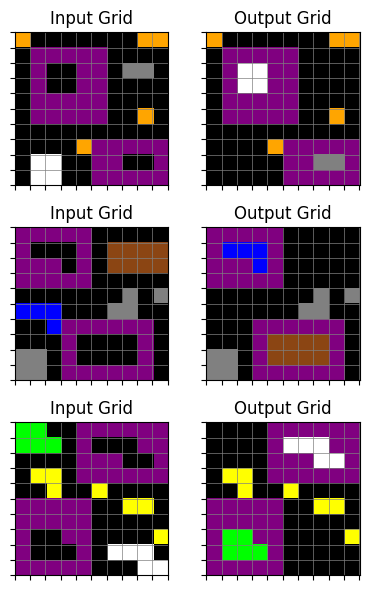

In [16]:
from matplotlib import pyplot as plt

example_id = "228f6490"

# Function to visualize grid with color scheme
def visualize_grids_with_colors(grids: list[dict[str, list[list[int]]]]):
    n_grids = len(grids)
    fig, axes = plt.subplots(n_grids, 2, figsize=(4, n_grids * 2))
    
    if n_grids == 1:
        axes = [axes]
    
    for i, grid in enumerate(grids):
        input_grid = np.array(grid['input'])
        output_grid = np.array(grid['output'])
        
        # Replace input and output grids with color values
        input_grid_colored = replace_with_colors(input_grid)
        output_grid_colored = replace_with_colors(output_grid)
        
        # Plot input grid
        axes[i][0].imshow(input_grid_colored, interpolation='nearest')
        axes[i][0].set_title('Input Grid')
        axes[i][0].axis('on')
        axes[i][0].grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)
        axes[i][0].set_xticks(np.arange(-0.55, input_grid.shape[1], 1))
        axes[i][0].set_yticks(np.arange(-0.5, input_grid.shape[0], 1))
        axes[i][0].set_xticklabels([])
        axes[i][0].set_yticklabels([])
        
        # Plot output grid
        axes[i][1].imshow(output_grid_colored, interpolation='nearest')
        axes[i][1].set_title('Output Grid')
        axes[i][1].axis('on')
        axes[i][1].grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)
        axes[i][1].set_xticks(np.arange(-0.55, output_grid.shape[1], 1))
        axes[i][1].set_yticks(np.arange(-0.5, output_grid.shape[0], 1))
        axes[i][1].set_xticklabels([])
        axes[i][1].set_yticklabels([])
    
    plt.tight_layout()
    plt.show()

# Example usage with colored grids
visualize_grids_with_colors(challenges[example_id]['train'])

In [ ]:

from scipy.ndimage import label

def find_contiguous_shapes(grid, color):
    labeled_array, num_features = label(grid == color)
    shapes = []
    for i in range(1, num_features + 1):
        shapes.append(np.argwhere(labeled_array == i))
    return shapes

def transform(grid: np.ndarray) -> np.ndarray:
    # Find shapes with distinct colors
    colors = np.unique(grid)
    shapes_with_distinct_colors = []
    for color in colors:
        if color == 0:
            continue
        shapes = find_contiguous_shapes(grid, color)
        if len(shapes) == 1:
            shapes_with_distinct_colors.append(shapes[0])

    # Identify the purple shapes
    purple_color = 5
    purple_shapes = find_contiguous_shapes(grid, purple_color)

    output = grid.copy()

    for purple_shape in purple_shapes:
        # Find the shapes of the "hole" in the purple shape
        hole = find_contiguous_shapes(purple_shape, 0)

        # Find the shape with a distinct color that matches the size of the hole
        for shape in shapes_with_distinct_colors:
            if len(shape) == len(hole):
                # Move the shape into the hole
                for cell in shape:
                    output[cell[0], cell[1]] = purple_color
                # Replace the old location of the shape with black
                for cell in hole:
                    output[cell[0], cell[1]] = 0
                break


    # Find the shapes of the distinct colors
    distinct_shapes = []
    for color in distinct_colors:
        distinct_shapes.append(find_contiguous_shapes(grid, color))
input_grid =np.array(challenges[example_id]['train'][1]['input'])
transformed_grid = transform(input_grid)
visualize_grids_with_colors([{'input': input_grid, 'output': transformed_grid}])

In [23]:
find_contiguous_shapes(input_grid, 6)

[array([[4, 7],
        [5, 6],
        [5, 7]]),
 array([[4, 9]]),
 array([[8, 0],
        [8, 1],
        [9, 0],
        [9, 1]])]

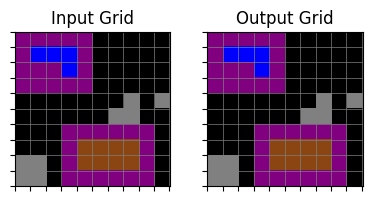

In [17]:

from scipy.ndimage import label

def find_contiguous_shapes(grid, color):
    labeled_array, num_features = label(grid == color)
    shapes = []
    for i in range(1, num_features + 1):
        shapes.append(np.argwhere(labeled_array == i))
    return shapes

def transform(grid: np.ndarray) -> np.ndarray:
    grey_color = 5
    black_color = 0

    # Find all grey outlines
    grey_shapes = find_contiguous_shapes(grid, grey_color)

    for grey_shape in grey_shapes:
        # Find the bounding box of the grey outline
        min_row, min_col = np.min(grey_shape, axis=0)
        max_row, max_col = np.max(grey_shape, axis=0)

        # Find the black cells inside the grey outline
        black_shape = np.argwhere(grid[min_row:max_row+1, min_col:max_col+1] == black_color)

        # Adjust the coordinates to the original grid
        black_shape += [min_row, min_col]

        # Find the shape that matches the black shape
        for color in range(1, 10):
            if color == grey_color or color == black_color:
                continue
            color_shapes = find_contiguous_shapes(grid, color)
            if len(color_shapes) > 1:
                # discard multiple disconnected shapes
                continue
            if len(color_shapes) == 0:
                continue

            color_shape = color_shapes[0]
            # this shape should be the same shape as the black shape
            if np.array_equal(np.diff(np.sort(black_shape, axis=0), axis=0), np.diff(np.sort(color_shape, axis=0), axis=0)):
                # Move the colored shape into the grey outline
                for cell in black_shape:
                    grid[cell[0], cell[1]] = color
                # Replace the old location of the colored shape with black
                for cell in color_shape:
                    grid[cell[0], cell[1]] = black_color
                break
        else:
            assert False, "No matching shape found"

    return grid


input_grid =np.array(challenges[example_id]['train'][1]['input'])
transformed_grid = transform(input_grid)
visualize_grids_with_colors([{'input': input_grid, 'output': transformed_grid}])